In [1]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
os.getcwd()

'/Users/murali/PycharmProjects/ASP_tut/10 - Fourier Transform: The Intuition'

In [3]:
# load audio file in the player
audio_path = "audio/piano_c.wav"
ipd.Audio(audio_path)

In [4]:
# load audio file
signal, sr = librosa.load(audio_path) #sr = sample rate, default is 22050

In [6]:
print(signal,sr)
print(max(signal))
print(min(signal))

for i in range(len(signal)):
    if (signal[i] == max(signal)) or (signal[i] == min(signal)):
        print(i)
        

[-3.4512475e-01 -5.7962286e-01 -5.7255304e-01 ...  3.0739122e-06
 -4.8659481e-06 -7.1212735e-06] 22050
0.680394
-0.7614547
406
2146


KeyboardInterrupt: 

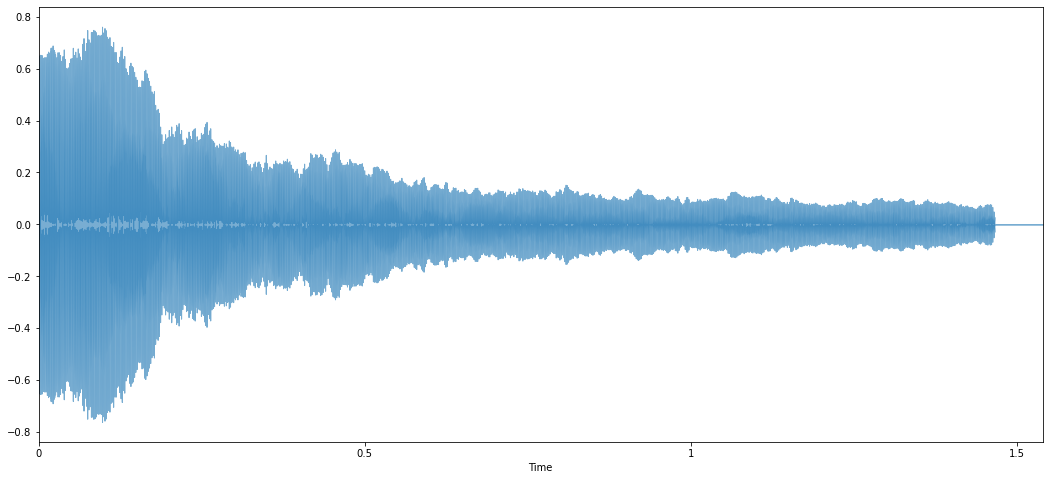

In [29]:
# plot waveform
plt.figure(figsize=(18,8))
librosa.display.waveplot(signal,sr,alpha=0.6)
plt.show()

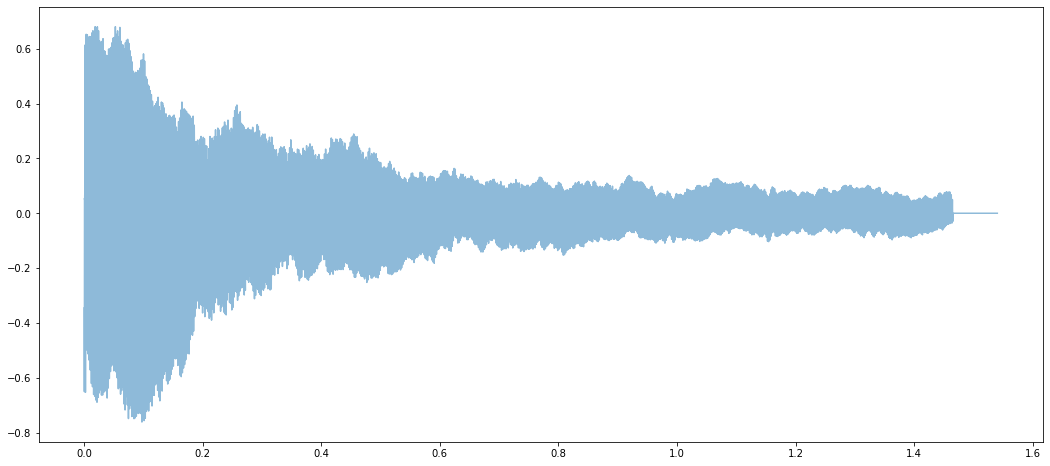

In [31]:
#same plot as above using matplotlib

samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18,8))
plt.plot(t,signal,alpha=0.5)
plt.show()

In [36]:
print(len(signal))
print(sr)
print(t)
print(len(t))

33968
22050
[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 1.54036281e+00
 1.54040816e+00 1.54045351e+00]
33968


In [8]:
# derive spectrum using FT
ft = sp.fft.fft(signal) # fast fourier transform from scipy module 
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude)) 

In [9]:
print(ft)
print(len(signal))
print(magnitude, len(magnitude))
print(frequency, len(frequency))

[-42.61859  -0.j        -34.296585 +6.560206j  -29.96304  +7.4250417j ...
 -27.41121 -12.946161j  -29.96304  -7.4250417j -34.296585 -6.560206j ]
33968
[42.61859  34.91836  30.869322 ... 30.314642 30.869322 34.91836 ] 33968
[0.00000000e+00 6.49159478e-01 1.29831896e+00 ... 2.20487017e+04
 2.20493508e+04 2.20500000e+04] 33968


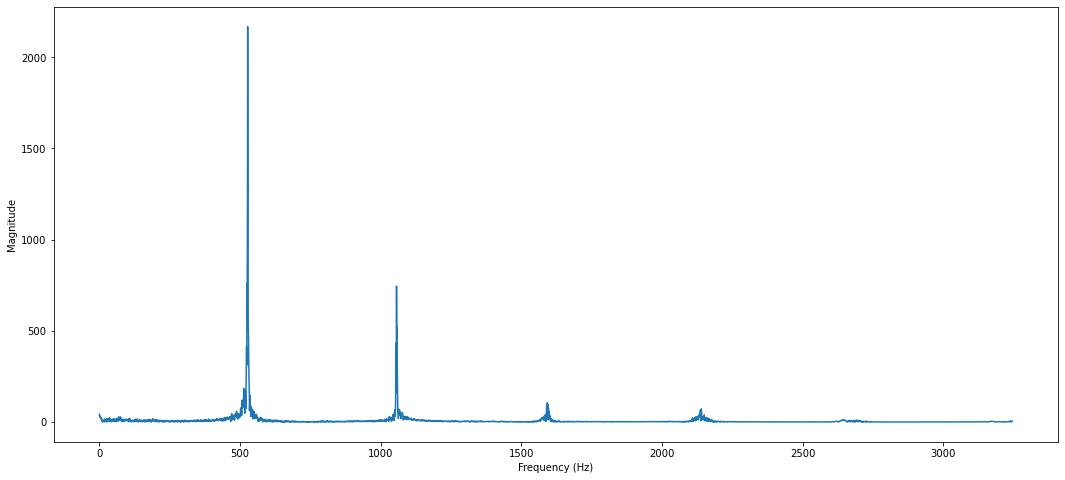

In [10]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [21]:
print(len(signal))
print(max(magnitude))

for i in range(len(magnitude)):
    if magnitude[i] == max(magnitude):
        print(i)
        break
print(frequency[812])

33968
2167.6492
812
527.1174963935584


In [12]:
d =  1 / sr
d

4.5351473922902495e-05

In [9]:
d_523 = 1 / 523
d_523

0.0019120458891013384

In [22]:
d_400_samples = 400 * d
d_400_samples

0.018140589569160998

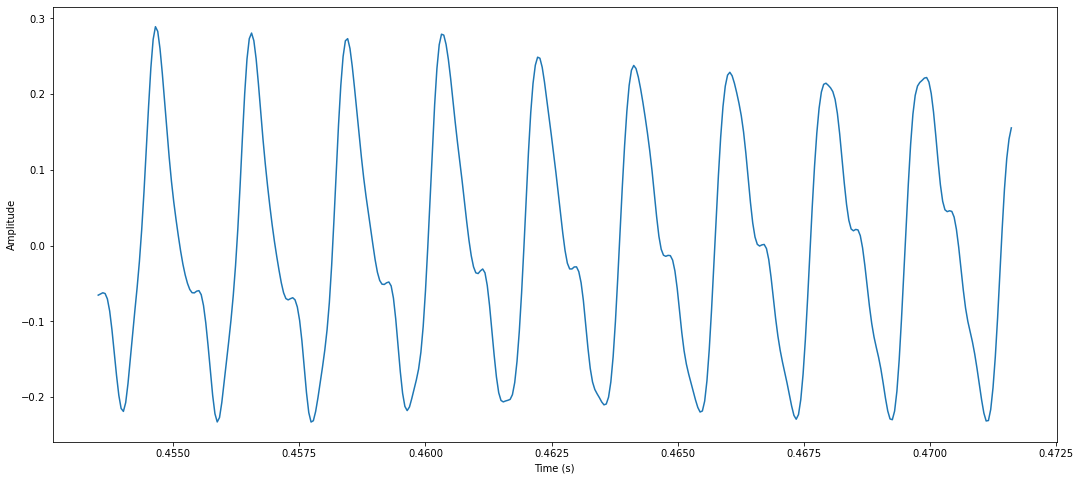

In [23]:
# zomm in to the waveform
samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

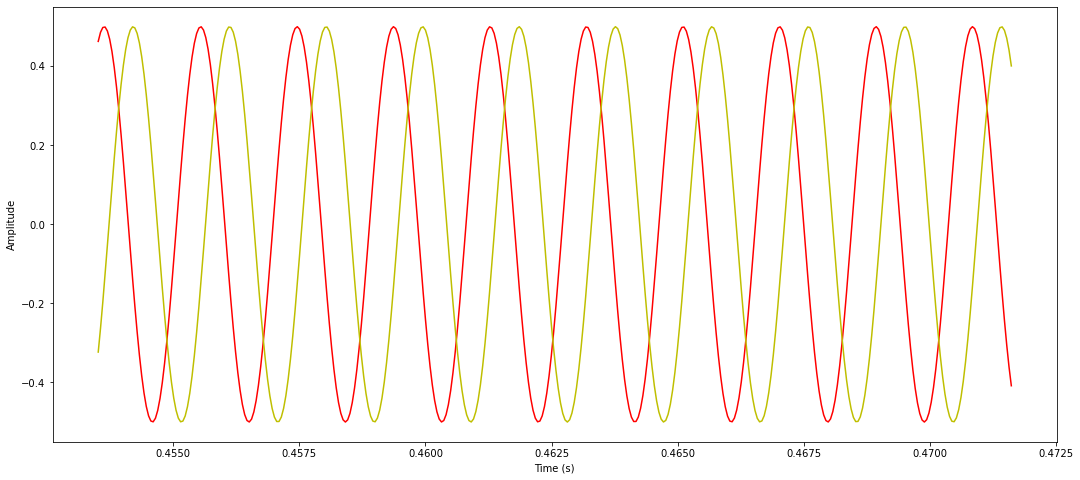

In [28]:
# create a sinusoid

# t = librosa.samples_to_time(samples, sr=sr)
f = 523
phase = 0
phase2 = 0.3

sin = 0.5 * np.sin(2*np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2*np.pi * (f * t - phase2))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

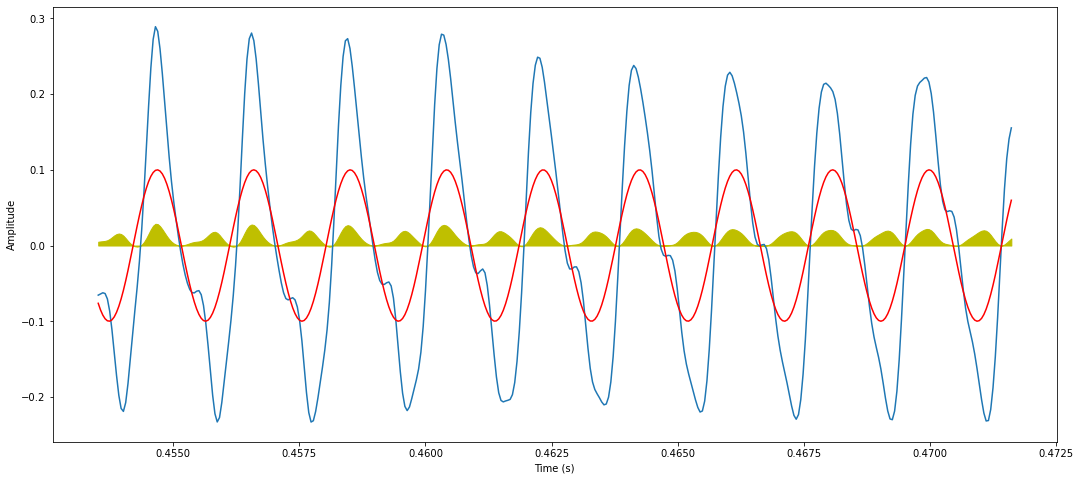

In [39]:
# compare signal and sinusoids

f = 523
phase = 0.55

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.plot(t[10000:10400], sin[10000:10400], color="r")

plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


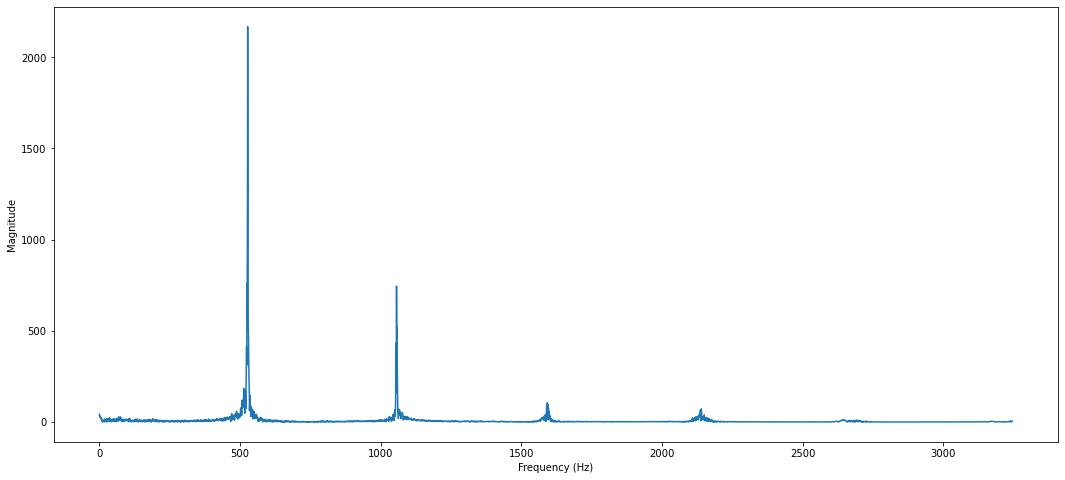

In [40]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

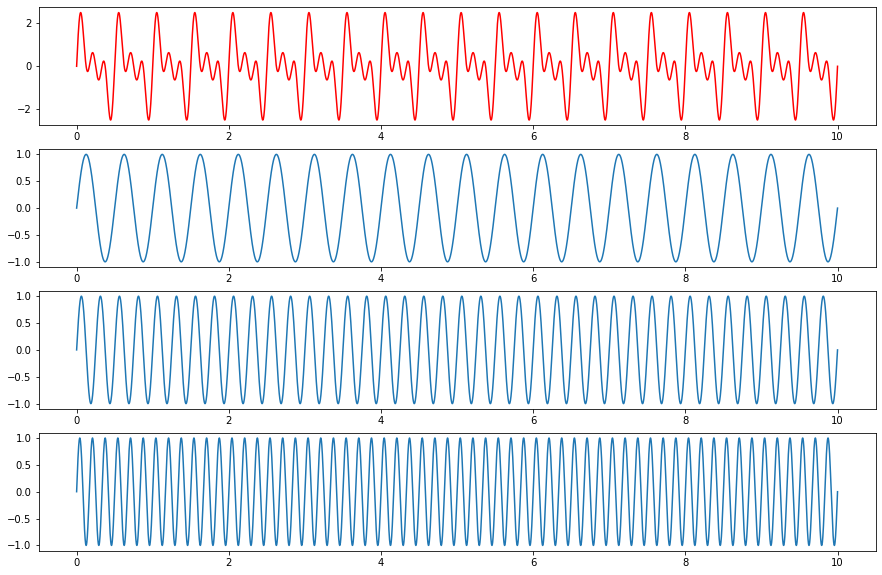

In [46]:
# superimposing pure tones
f = 2
t = np.linspace(0, 10, 10000)

sin = np.sin(2*np.pi * (f * t))
sin2 = np.sin(2*np.pi * (2*f * t))
sin3 = np.sin(2*np.pi * (3*f * t))

sum_signal = sin + sin2 + sin3

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, sum_signal, color="r")

plt.subplot(4, 1, 2)
plt.plot(t, sin)

plt.subplot(4, 1, 3)
plt.plot(t, sin2)

plt.subplot(4, 1, 4)
plt.plot(t, sin3)

plt.show()